In [1]:
import numpy as np
import requests
import re
import pprint
import matplotlib
import pandas as pd

     |████████████████████████████████| 7.3 MB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 885 kB 40.1 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-8.4.0-cp39-cp39-macosx_10_10_x86_64.whl (3.0 MB)
  Using cached kiwisolver-1.3.2-cp39-cp39-macosx_10_9_x86_64.whl (61 kB)
You should consider upgrading via the '/Users/bryankristiono/dev/fead_data_service/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
with open("../.cookie.txt") as f:
    line = f.read().split(":")
    headers = {line[0]: line[1].strip()}
    resp = requests.get("https://adventofcode.com/2021/leaderboard/private/view/452702.json", headers=headers)

In [8]:
# pprint.pprint(resp.json()["members"])

In [18]:
members = resp.json()["members"]
from collections import OrderedDict

time_df = pd.DataFrame([])
for id, value in members.items():
    name = value["name"]
    stars = value["stars"]
    df = pd.json_normalize(value["completion_day_level"])
    df.index = [name]
    time_df = pd.concat([time_df, df], axis=0)
time_df.rename(columns=lambda x: x[:-12], inplace=True) # remove ".get_star_ts"
time_df = time_df.reindex(sorted(time_df.columns, key = float), axis=1).T # Sort columns and transpose
time_df.index = [i for i in range(1,len(time_df.index)+1)] # Change float to int
time_df = time_df.applymap(lambda x: pd.Timestamp(x, unit="s", tz="EST"), na_action="ignore")
display(time_df)

,NaN,yifanl1,Mark Oosterveld,Kristinus
1,2021-12-01 16:14:12-05:00,2021-12-01 16:10:00-05:00,2021-12-01 16:08:44-05:00,2021-12-01 16:26:06-05:00
2,2021-12-01 16:17:01-05:00,2021-12-01 16:16:58-05:00,2021-12-01 16:20:14-05:00,2021-12-01 16:43:11-05:00
3,2021-12-02 09:51:43-05:00,2021-12-02 09:55:57-05:00,NaT,2021-12-02 10:28:21-05:00
4,2021-12-02 10:08:12-05:00,2021-12-02 09:57:51-05:00,NaT,2021-12-02 10:30:46-05:00
5,2021-12-03 10:03:46-05:00,2021-12-03 09:27:01-05:00,NaT,2021-12-03 16:49:43-05:00
6,2021-12-03 10:42:26-05:00,2021-12-03 09:49:00-05:00,NaT,2021-12-03 17:11:59-05:00
7,2021-12-04 01:46:24-05:00,2021-12-04 10:21:46-05:00,NaT,2021-12-04 03:13:46-05:00
8,2021-12-04 02:01:51-05:00,2021-12-04 10:22:42-05:00,NaT,2021-12-04 03:37:47-05:00
9,2021-12-05 01:04:16-05:00,2021-12-05 09:17:34-05:00,NaT,2021-12-05 00:58:31-05:00
10,2021-12-05 01:17:08-05:00,2021-12-05 09:21:48-05:00,NaT,2021-12-05 01:25:45-05:00


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

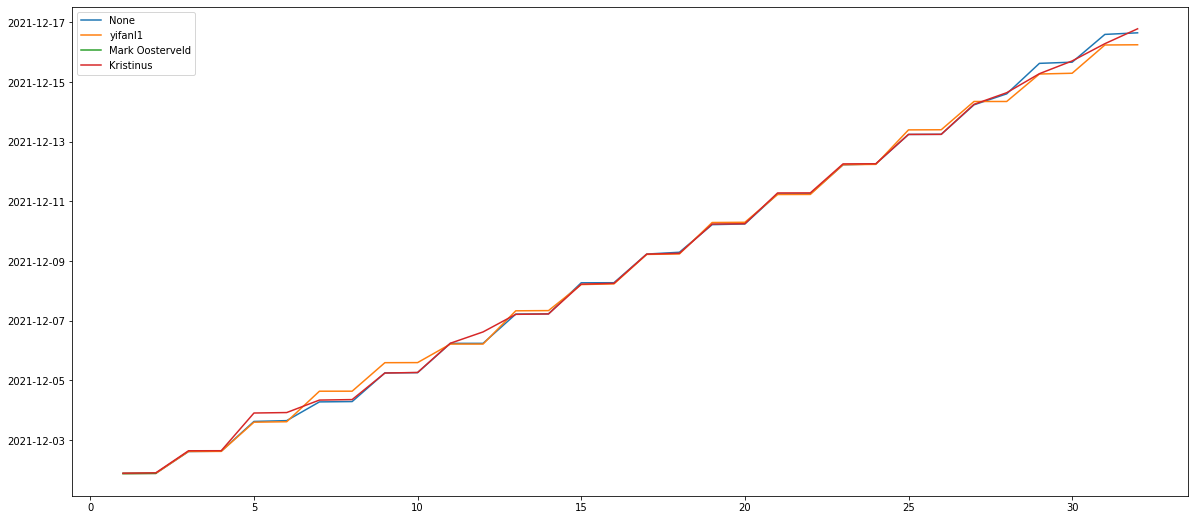

In [45]:
import matplotlib.pyplot as plt
plt.figure()
time_df.plot(figsize=(20,9))

In [46]:
from dateutil.relativedelta import relativedelta
import math
def relative(x):
    return x - pd.Series([pd.Timestamp(year=2021, month=12, day=math.ceil(i/2), tz="EST") for i in x.index], index=x.index)
rel_time_df = time_df.apply(relative)
rel_time_df = rel_time_df.applymap(lambda x: x.total_seconds()//60, na_action="ignore")
rel_time_df

,NaN,yifanl1,Mark Oosterveld,Kristinus
1,974.0,970.0,968.0,986.0
2,977.0,976.0,980.0,1003.0
3,591.0,595.0,NaT,628.0
4,608.0,597.0,NaT,630.0
5,603.0,567.0,NaT,1009.0
6,642.0,589.0,NaT,1031.0
7,106.0,621.0,NaT,193.0
8,121.0,622.0,NaT,217.0
9,64.0,557.0,NaT,58.0
10,77.0,561.0,NaT,85.0


<AxesSubplot:>

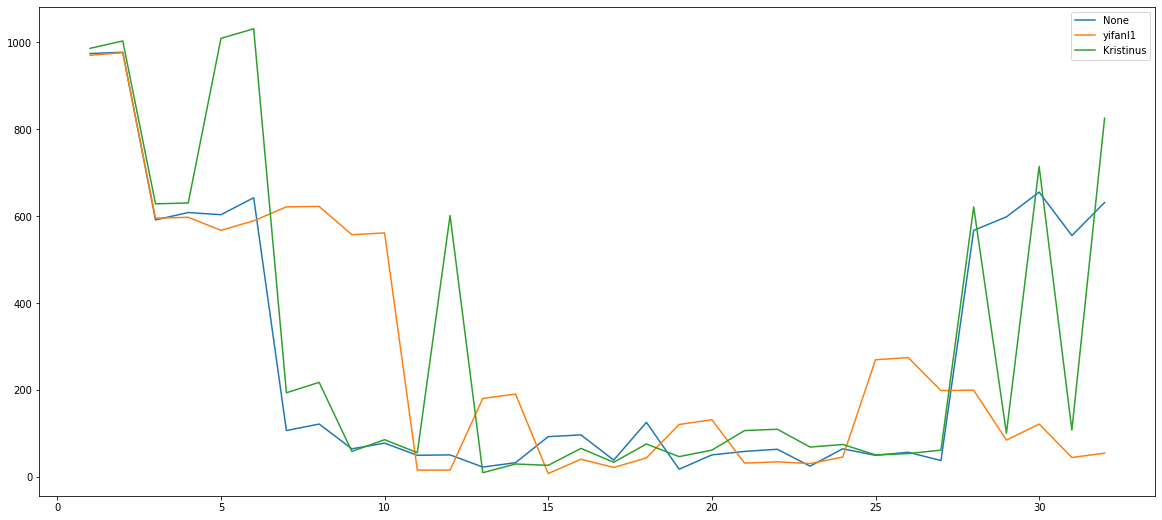

In [47]:
from matplotlib.ticker import FuncFormatter
# formatter = FuncFormatter(lambda x,pos: "{:d}{:02d}".format(int(x//3600), int(x%3600)//60))
rel_time_df.plot(figsize=(20,9))